In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import GaussianSmoother
import spikeinterface
import spikeinterface.full as si
import spikeinterface.extractors as se                                      
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as sp
import spikeinterface.preprocessing as spre
import spikeinterface.qualitymetrics as qm
import helper_functions as helper
from spikeinterface.sorters import run_sorter_local

In [ ]:
full_path = '/mnt/disk15tb/mmpatil/Axontracking/000026/data.raw.h5'
rec_id = 0
common_el = list(range(30000))
while rec_id < 3: #True:
    rec_name = 'rec' + '%0*d' % (4, rec_id)
    try:   
        rec = si.MaxwellRecordingExtractor(full_path,stream_name='well000',rec_name=rec_name)
        rec_el = rec.get_property("contact_vector")["electrode"]
        common_el = list(set(common_el).intersection(rec_el))
        rec_id += 1
    except Exception:
        break
            

In [ ]:
rec_id


In [ ]:
rec_list = []
for r in range(rec_id): #rec_id
    rec_name = 'rec' + '%0*d' % (4, r)
    rec = si.MaxwellRecordingExtractor(full_path,stream_name='well000',rec_name=rec_name)
    ch_id = rec.get_property("contact_vector")['device_channel_indices']
    rec_el = rec.get_property("contact_vector")["electrode"]
    
    chan_idx = [np.where(rec_el == el)[0][0] for el in common_el]
    print(f'x{rec.get_property("contact_vector")["x"][chan_idx]}y{rec.get_property("contact_vector")["y"][chan_idx]}')
    sel_channels = rec.get_channel_ids()[chan_idx]
    rec_centered = si.filter(rec, band=[150,4999])
    rec_list.append(rec_centered.channel_slice(sel_channels, renamed_channel_ids=list(range(len(chan_idx)))))

multirecording = si.concatenate_recordings(rec_list)

In [3]:
full_path = '/mnt/disk20tb/PrimaryNeuronData/Maxtwo/Folic_Acid_T2/Folic_Acid_T2/240209/M07038/ActivityScan/000047/data.raw.h5'
import h5py
stream_id = "well001"
h5 = h5py.File(full_path, mode="r")
rec_names = list(h5["wells"][stream_id].keys())
recs =list()
for rec_name in rec_names:
    recs.append(si.MaxwellRecordingExtractor(full_path,stream_name=stream_id,rec_name=rec_name))

aggregated_rec = si.aggregate_channels(recs)
print(aggregated_rec)

ValueError: Sortings don't have the same sampling_frequency/num_segments/dtype/num samples

In [29]:
print([x for x in h5['wells'].keys()])

['well000', 'well001', 'well002', 'well003', 'well004', 'well005']


In [26]:
print(h5['wellplate']['version'])

<HDF5 dataset "version": shape (1,), type "|S23">


In [ ]:
chan_idx

In [ ]:
multirecording.get_channel_ids()

In [ ]:
#Reading the file, BP filtering
#path of the network file
local_path= '/mnt/disk15tb/mmpatil/Axontracking/000026/data.raw.h5' #network data from chip 16848
recordings =list()
for recnames in ['rec0000', 'rec0001', 'rec0002', 'rec0003', 'rec0004', 'rec0005', 'rec0006', 'rec0007', 'rec0008', 'rec0009', 'rec0010', 'rec0011', 'rec0012', 'rec0013', 'rec0014', 'rec0015', 'rec0016', 'rec0017', 'rec0018', 'rec0019', 'rec0020', 'rec0021', 'rec0022', 'rec0023', 'rec0024', 'rec0025', 'rec0026', 'rec0027', 'rec0028', 'rec0029', 'rec0030', 'rec0031', 'rec0032', 'rec0033', 'rec0034', 'rec0035', 'rec0036', 'rec0037', 'rec0038', 'rec0039']:
    recordings.append(se.read_maxwell(local_path,stream_id='well000',rec_name=recnames)) #well000 - well005 for maxtwo 

recording1 = si.aggregate_channels(recordings)

#recording = si.ConcatenateSegmentRecording([recording1,recording2])
channel_ids = recording1.get_channel_ids()
fs = recording1.get_sampling_frequency()
num_chan = recording1.get_num_channels()
num_seg = recording1.get_num_segments()
total_recording = recording1.get_total_duration()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

recording_bp = spre.bandpass_filter(recording1, freq_min=300, freq_max=3000)

recodring_cmr = spre.common_reference(recording_bp, reference='global', operator='median')
#recording_chunk = recodring_cmr.frame_slice(start_frame= 1*fs,end_frame=425*fs)
recording_chunk = recodring_cmr.frame_slice(start_frame= 0*fs,end_frame=180*fs)
print(f"chunk duration: {recording_chunk.get_total_duration()} s")

In [2]:
local_path= '/mnt/disk20tb/240425/18832/Network/000020/data.raw.h5' #network data from chip 16848


recording1 = se.read_maxwell(local_path,stream_id='well000')

#recording = si.ConcatenateSegmentRecording([recording1,recording2])
channel_ids = recording1.get_channel_ids()
fs = recording1.get_sampling_frequency()
num_chan = recording1.get_num_channels()
num_seg = recording1.get_num_segments()
total_recording = recording1.get_total_duration()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

recording_bp = spre.bandpass_filter(recording1, freq_min=300, freq_max=3000)

recodring_cmr = spre.common_reference(recording_bp, reference='global', operator='median')
#recording_chunk = recodring_cmr.frame_slice(start_frame= 1*fs,end_frame=425*fs)
recording_chunk = recodring_cmr.frame_slice(start_frame= 0*fs,end_frame=300*fs)
print(f"chunk duration: {recording_chunk.get_total_duration()} s")

Sampling frequency: 20000.0
Number of channels: 999
Number of segments: 1
total_recording: 300.08 s
chunk duration: 300.0 s


## RUnnig sorting

In [ ]:
traces = recording_chunk.get_traces(start_frame=100, end_frame=50000*15, segment_index=0,return_scaled=True)


In [ ]:
traces = recording_chunk.get_traces(start_frame=290500, end_frame=291800, segment_index=0,return_scaled=True)
plt.figure(figsize=(12,2))
plt.plot(traces[:,500])
plt.savefig('/home/mmp/Documents/traces/fulltrace.svg',format='svg')
plt.show()

In [ ]:
traces = recording_chunk.get_traces(start_frame=278860, end_frame=278910, segment_index=0,return_scaled=True)
plt.figure(figsize=(3,4))
plt.plot(traces[:,500])
plt.savefig('/home/mmp/Documents/traces/zoomedin.svg',format='svg')
plt.show()

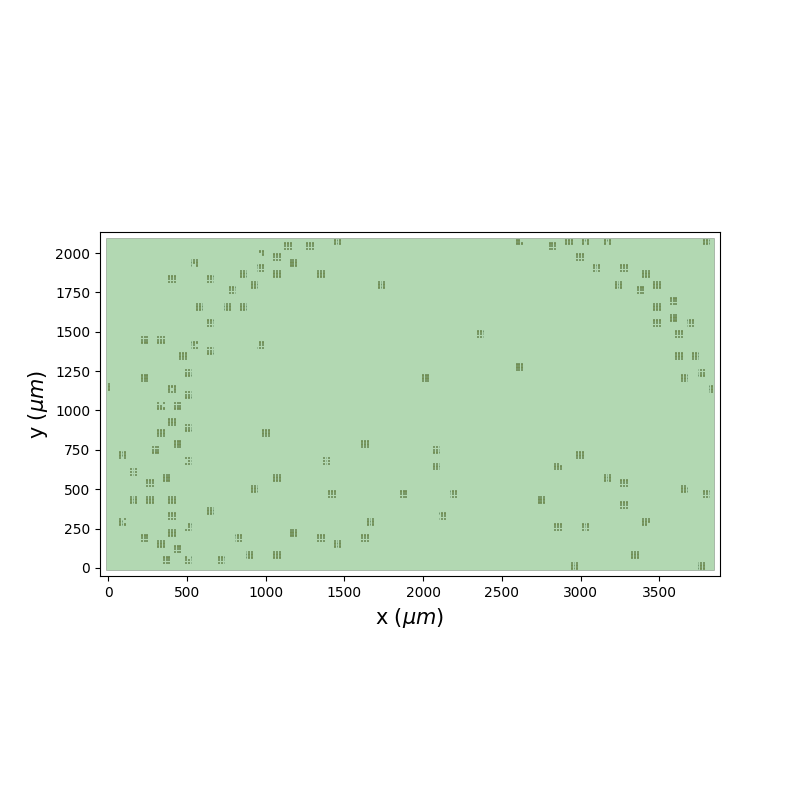

In [4]:
%matplotlib widget
fig,ax = plt.subplots(figsize=(8,8))
si.plot_probe_map(recording1,ax=ax,with_channel_ids=False)


In [5]:
output_folder = "./sorting/organoid25apr_networkNU9_"

docker_image= "rohanmalige/benshalom:v3"

In [6]:
#aggregated_rec= aggregated_rec.save(fodler="./sorting/recordingtest",progress_bar=True,verbose=True)

default_KS2_params = si.get_default_sorter_params('kilosort2')
print(default_KS2_params)
#default_KS2_params['keep_good_only'] = True
default_KS2_params['detect_threshold'] = 5.5
# default_KS2_params['projection_threshold']=[18, 10]
default_KS2_params['n_jobs'] = 32
# global_job_kwargs = dict(n_jobs=32, total_memory="8G", progress_bar=True)
# si.set_global_job_kwargs(**global_job_kwargs)
sortingKS3 = si.run_sorter('kilosort2',recording=recording_chunk, output_folder=f'{output_folder}_KS',docker_image= docker_image,verbose=True,remove_existing_folder=True, **default_KS2_params)


{'detect_threshold': 6, 'projection_threshold': [10, 4], 'preclust_threshold': 8, 'momentum': [20.0, 400.0], 'car': True, 'minFR': 0.1, 'minfr_goodchannels': 0.1, 'freq_min': 150, 'sigmaMask': 30, 'lam': 10.0, 'nPCs': 3, 'ntbuff': 64, 'nfilt_factor': 4, 'NT': None, 'AUCsplit': 0.9, 'wave_length': 61, 'keep_good_only': False, 'skip_kilosort_preprocessing': False, 'scaleproc': None, 'save_rez_to_mat': False, 'delete_tmp_files': ('matlab_files',), 'delete_recording_dat': False, 'n_jobs': 48, 'chunk_duration': '1s', 'progress_bar': True, 'mp_context': None, 'max_threads_per_process': 1}
installation_mode='auto' switching to installation_mode: 'github'
Starting container
Installing neo with pypi in container
Installing h5py with pypi in container
Running kilosort2 sorter inside rohanmalige/benshalom:v3
Stopping container


In [7]:

# loading the KS2 sorted object
sortingKS3 = sortingKS3.remove_empty_units()
sortingKS3 = spikeinterface.curation.remove_excess_spikes(sortingKS3,recording1) #Sometimes KS returns spikes outside the number of samples. < https://github.com/SpikeInterface/spikeinterface/pull/1378>

sortingKS3= sortingKS3.save(folder = f'{output_folder}_KS2',overwrite=True)
#sorting_KS3 = s.Kilosort2Sorter._get_result_from_folder('./sorting/FolicAcidT2M07038_2_KS/sorter_output')
total_units = sortingKS3.get_unit_ids()
print(len(total_units))
#print(len(total_units))
channel_ids = recording_chunk.get_channel_ids()
print(channel_ids)



267
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177' '178' '179' '180' '181' '182'

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/core/basesorting.py:239: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


## Extracting the waveforms

In [8]:

job_kwargs = dict(n_jobs=32, chunk_duration="1s", progress_bar=True)
#waveforms = si.extract_waveforms(recording_chunk,sorting_KS3,folder="./waveformsblock1_7min",overwrite=True, ms_before=1., ms_after=2.,**job_kwargs)

#recording1.annotate(is_filtered=True)
waveforms = si.extract_waveforms(recording_chunk,sortingKS3,folder=f'{output_folder}_WF',overwrite=True,**job_kwargs)
print(waveforms)

extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

WaveformExtractor: 999 channels - 267 units - 1 segments
  before:20 after:40 n_per_units:500 - sparse


In [ ]:
si.export_to_phy(waveform_extractor=waveforms,output_folder='./sorting/SPTAN1_1_16793_phy',**job_kwargs)

In [9]:
extremum_channels_ids =si.get_template_extremum_channel(waveforms,peak_sign ='both',mode='at_index')

In [10]:
extremum_channels_ids

{0: '386',
 1: '386',
 2: '386',
 3: '386',
 4: '386',
 5: '386',
 6: '386',
 7: '386',
 9: '386',
 10: '386',
 11: '386',
 12: '386',
 13: '386',
 14: '386',
 15: '386',
 16: '386',
 17: '386',
 18: '386',
 19: '386',
 20: '386',
 21: '386',
 22: '386',
 23: '386',
 24: '386',
 25: '386',
 26: '386',
 27: '386',
 28: '386',
 29: '386',
 31: '386',
 32: '386',
 33: '386',
 34: '386',
 35: '386',
 36: '386',
 37: '386',
 38: '386',
 39: '386',
 40: '386',
 41: '386',
 43: '386',
 44: '386',
 45: '386',
 46: '386',
 47: '386',
 48: '386',
 49: '386',
 50: '386',
 51: '386',
 52: '386',
 53: '386',
 57: '386',
 58: '386',
 59: '386',
 60: '386',
 61: '386',
 62: '386',
 63: '386',
 65: '386',
 66: '386',
 67: '386',
 68: '386',
 69: '386',
 70: '386',
 72: '386',
 73: '386',
 75: '386',
 76: '386',
 78: '386',
 79: '386',
 80: '386',
 81: '386',
 82: '386',
 83: '386',
 84: '386',
 85: '386',
 86: '386',
 88: '386',
 89: '386',
 90: '386',
 91: '386',
 92: '386',
 93: '386',
 94: '386',
 

In [ ]:
template = waveforms.get_template(5,mode='median')
template.shape

In [33]:
waveforms = si.load_waveforms('/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/KMB_RTT_18646_waveforms')
print(waveforms)
job_kwargs = dict(n_jobs=16, chunk_duration="1s", progress_bar=True)
sp.compute_spike_amplitudes(waveforms,load_if_exists=True,**job_kwargs)
metrics = qm.compute_quality_metrics(waveforms,load_if_exists=False,**job_kwargs)

WaveformExtractor: 994 channels - 348 units - 1 segments
  before:20 after:40 n_per_units:500 - sparse


extract amplitudes:   0%|          | 0/300 [00:00<?, ?it/s]

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:1221: UserWarning: Amplitude PDF does not have a unique minimum! More spikes might be required for a correct amplitude_cutoff computation!
  warnings.warn(
/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [0, 1, 4, 5, 6, 7, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 31, 32, 34, 35, 41, 42, 45, 46, 51, 52, 53, 54, 65, 67, 69, 70, 72, 78, 80, 82, 85, 86, 87, 88, 90, 92, 94, 95, 96, 98, 99, 102, 103, 104, 110, 112, 113, 114, 118, 124, 125, 126, 129, 130, 131, 132, 134, 135, 140, 141, 144, 148, 153, 155, 156, 159, 161, 162, 163, 164, 165, 168, 169, 170, 172, 173, 175, 177, 178, 179, 180, 181, 182, 183, 185, 186, 189, 190, 193, 195, 196, 197, 199, 202, 209, 210, 213, 218, 222, 223, 226, 227, 228, 229, 230, 231, 232, 236, 237, 239, 240, 247, 248, 250, 251, 252, 254, 256, 257, 258, 261, 262, 264, 265, 266, 268, 271, 272, 27

In [1]:
import mea_analysis_pipeline
import importlib
importlib.reload(mea_analysis_pipeline)

<module 'mea_analysis_pipeline' from '/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/mea_analysis_pipeline.py'>

In [34]:

updated_metrics = mea_analysis_pipeline.remove_violated_units(metrics)

In [35]:
non_violated = updated_metrics.index

In [ ]:
from spikeinterface.postprocessing import compute_spike_amplitudes, compute_principal_components
from spikeinterface.exporters import export_to_phy


_ = compute_principal_components(waveform_extractor=waveforms, n_components=3, mode='by_channel_global',**job_kwargs)

# the export process is fast because everything is pre-computed


In [ ]:
job_kwargs = dict(n_jobs=48, chunk_duration="1s", progress_bar=True)
sparsity = spikeinterface.core.compute_sparsity(waveforms ,method="radius", radius_um=40)
export_to_phy(waveform_extractor=waveforms, output_folder='/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/M07038_phy',sparsity=sparsity,**job_kwargs)

In [ ]:
display(update_qual_metrics)

In [ ]:
print(non_violated_units)

In [ ]:
len(non_violated_units)

In [ ]:
waveform_good = waveforms.select_units(non_violated_units,new_folder='./sorting/FolicAcidT2M07038_2_waveformsgood/')

In [ ]:
correlograms, bins = sp.compute_correlograms(waveform_good)

In [ ]:
correlograms.shape

In [ ]:
import matplotlib.pyplot as plt

# Extracting the correlation values between units 2 and 5 across all bins
# Adjusting indices for 0-based Python indexing
correlations = correlograms[2, 2, :]

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(correlations, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Correlations Between Units 2 and 5 Across Bins')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bins

In [ ]:
metrics = qm.compute_quality_metrics(waveform_good,load_if_exists=False,**job_kwargs)

In [ ]:
display(metrics)

In [ ]:
waveform_good = None

In [ ]:
waveform_good = si.load_waveforms('./sorting/waveformsgood_Folicacid10mg/')

In [ ]:
metrics = qm.compute_quality_metrics(waveform_good,load_if_exists=False,**job_kwargs)

In [ ]:
display(metrics)

{0: array([3.46815783e+03, 1.03369475e+03, 1.00720885e+00]), 1: array([3.20260745e+03, 1.22503994e+03, 1.43096136e+00]), 4: array([1.01551523e+03, 5.74822356e+02, 1.00000000e+00]), 5: array([1.01493177e+03, 5.73679868e+02, 1.00000000e+00]), 6: array([1.02182138e+03, 5.75870525e+02, 1.00000000e+00]), 7: array([1112.93228364,  997.17822916,    1.34162158]), 8: array([3.61921905e+03, 1.24049542e+03, 1.25387860e+00]), 9: array([921.78364456, 879.95928561,   1.        ]), 10: array([ 752.44689199, 1067.43588515,    1.26943001]), 11: array([906.24393614, 816.63102147,   1.        ]), 12: array([905.28882882, 816.92414591,   1.        ]), 13: array([904.81501925, 827.01263311,   1.        ]), 14: array([905.92381102, 816.08533527,   1.        ]), 15: array([ 858.38310118, 1469.82265423,    3.30718126]), 16: array([1.05701486e+03, 1.06391730e+03, 1.00000000e+00]), 17: array([3.27260446e+03, 1.08511269e+03, 1.70208774e+00]), 18: array([3.27257106e+03, 1.08512914e+03, 2.00550180e+00]), 19: array

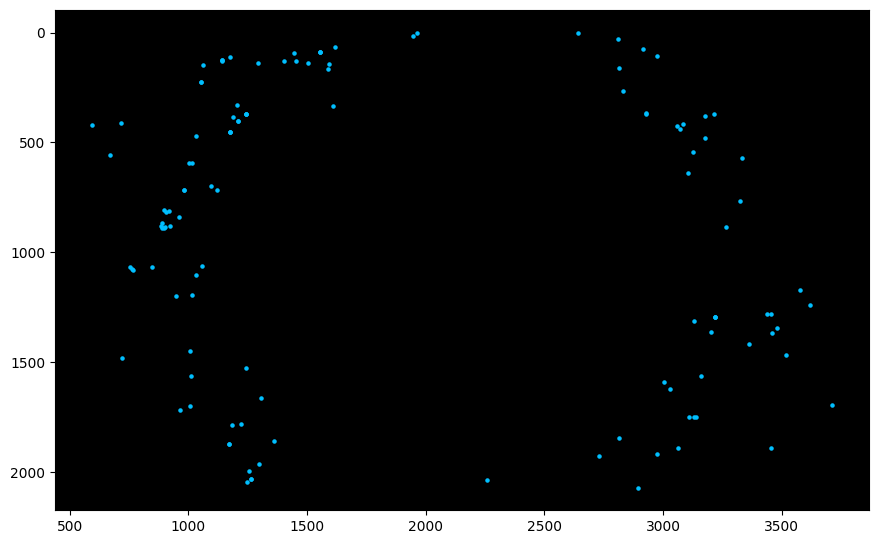

In [36]:

#locations = sp.compute_unit_locations(waveforms)
non_violated = updated_metrics.index
unit_ids = waveforms.unit_ids
locations = sp.compute_unit_locations(waveforms)
#print(locations)
unit_locations =dict(zip(unit_ids,locations))
print(unit_locations)
#np.savetxt("unitloc_10mins.txt",locations)
fig,ax = plt.subplots(figsize=(10.5,6.5))
#sw.plot_probe_map(mu,ax=ax,with_channel_ids=False)
ax.set_facecolor('#000000') 
print(len(non_violated))
for unit_id, (x,y,z) in unit_locations.items() :
    if unit_id in non_violated:
        ax.scatter(x,y, s=5,c='deepskyblue')
    
ax.invert_yaxis()
plt.savefig(f'/home/mmp/Documents/organoidKMB/REtt_unitlocations.svg',format='svg')

In [25]:
import pandas as pd

updated_metrics

,amplitude_cutoff,amplitude_cv_median,amplitude_cv_range,amplitude_median,firing_range,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8
0,0.007324,0.087263,0.036296,94.413757,7.41,2.100000,0.000000,0.0,630.0,1.0,0.0,0.0,1.327198,0.090,9.851611,0.152381,0.001587,0.0
1,0.015023,0.228086,0.087035,81.825256,4.22,2.916667,0.000000,0.0,875.0,1.0,0.0,0.0,2.278150,0.135,8.768378,0.069714,0.000000,0.0
3,0.001691,0.420412,0.088204,18.882751,5.23,2.040000,0.000000,0.0,612.0,1.0,0.0,0.0,1.305994,0.125,inf,0.098039,0.000000,0.0
5,0.010771,0.109274,0.064426,107.002258,8.43,2.000000,0.000000,0.0,600.0,1.0,0.0,0.0,2.124837,0.110,11.300419,0.190000,0.005000,0.0
6,0.001351,0.109935,0.045825,75.531006,6.89,11.756667,0.000000,0.0,3527.0,1.0,0.0,0.0,1.154775,0.005,8.124912,0.033173,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.000316,NaN,NaN,75.531006,14.63,2.726667,0.747246,5.0,818.0,1.0,1.0,7.0,1.841130,NaN,7.733711,0.118582,0.001222,0.0
381,0.004009,0.246110,0.105217,37.765503,5.24,5.100000,0.085437,2.0,1530.0,1.0,0.0,0.0,1.326355,0.125,4.177794,0.051634,0.000000,0.0
383,0.000378,0.244141,0.113361,31.471252,4.60,2.293333,0.000000,0.0,688.0,1.0,0.0,0.0,1.258151,0.270,3.162011,0.074128,0.000000,0.0
384,0.004800,0.203662,0.105812,50.354004,6.47,3.436667,0.470384,5.0,1031.0,1.0,1.0,4.0,1.800363,0.325,5.435042,0.072745,0.001940,0.0


In [37]:
updated_metrics.to_excel('/home/mmp/Documents/organoidKMB/updated_metrics_RETT.xlsx', index=False)


In [38]:
wild_update_metrics = pd.read_excel('/home/mmp/Documents/organoidKMB/updated_metrics_WT.xlsx')

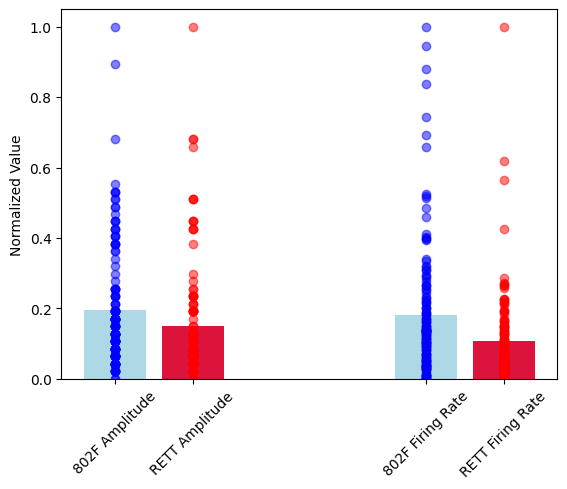

In [52]:
import matplotlib.pyplot as plt

# Calculate the minimum and maximum values of the amplitude_median column
min_wild_update_metrics = wild_update_metrics['amplitude_median'].min()
max_wild_update_metrics = wild_update_metrics['amplitude_median'].max()
min_updated_metrics = updated_metrics['amplitude_median'].min()
max_updated_metrics = updated_metrics['amplitude_median'].max()

# Calculate the minimum and maximum values of the firing_rate column
min_wild_update_firing_rate = wild_update_metrics['firing_rate'].min()
max_wild_update_firing_rate = wild_update_metrics['firing_rate'].max()
min_updated_firing_rate = updated_metrics['firing_rate'].min()
max_updated_firing_rate = updated_metrics['firing_rate'].max()

# Normalize the data using min-max normalization
normalized_minmax_wild_update_metrics = wild_update_metrics['amplitude_median'].apply(lambda x: (x - min_wild_update_metrics) / (max_wild_update_metrics - min_wild_update_metrics))
normalized_minmax_updated_metrics = updated_metrics['amplitude_median'].apply(lambda x: (x - min_updated_metrics) / (max_updated_metrics - min_updated_metrics))
normalized_minmax_wild_update_firing_rate = wild_update_metrics['firing_rate'].apply(lambda x: (x - min_wild_update_firing_rate) / (max_wild_update_firing_rate - min_wild_update_firing_rate))
normalized_minmax_updated_firing_rate = updated_metrics['firing_rate'].apply(lambda x: (x - min_updated_firing_rate) / (max_updated_firing_rate - min_updated_firing_rate))

# Set the x-axis positions for the bars
x_pos = [1, 1.5, 3, 3.5]

# Calculate the means of the normalized metrics to plot
mean_normalized_wild_amplitude = normalized_minmax_wild_update_metrics.mean()
mean_normalized_updated_amplitude = normalized_minmax_updated_metrics.mean()
mean_normalized_wild_firing_rate = normalized_minmax_wild_update_firing_rate.mean()
mean_normalized_updated_firing_rate = normalized_minmax_updated_firing_rate.mean()

# Set the heights for the bars
heights = [
    mean_normalized_wild_amplitude, 
    mean_normalized_updated_amplitude, 
    mean_normalized_wild_firing_rate, 
    mean_normalized_updated_firing_rate
]

# Set the colors for the bars
colors = ['lightblue', 'crimson', 'lightblue', 'crimson']

# Bar plot for the normalized mean amplitude_median column
plt.bar(x_pos, heights, color=colors, width=0.4)

# Scatter plot for the remaining series values
plt.scatter([1]*len(normalized_minmax_wild_update_metrics), normalized_minmax_wild_update_metrics, color='blue', alpha=0.5)
plt.scatter([1.5]*len(normalized_minmax_updated_metrics), normalized_minmax_updated_metrics, color='red', alpha=0.5)
plt.scatter([3]*len(normalized_minmax_wild_update_firing_rate), normalized_minmax_wild_update_firing_rate, color='blue', alpha=0.5)
plt.scatter([3.5]*len(normalized_minmax_updated_firing_rate), normalized_minmax_updated_firing_rate, color='red', alpha=0.5)

plt.ylabel('Normalized Value')
plt.xticks(x_pos, ['802F Amplitude', 'RETT Amplitude', '802F Firing Rate', 'RETT Firing Rate'], rotation=45)

plt.show()

